<a href="https://www.kaggle.com/code/hagarmohamed0310/inceptionv3-pre-trained?scriptVersionId=161164899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os,cv2
import glob as gb
import tensorflow as tf
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from tensorflow.keras import datasets,models,layers
import seaborn as sn
from tensorflow import keras
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from IPython.display import Image, display
from keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D,BatchNormalization
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten
from keras.applications import InceptionV3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path="../input/intel-image-classification/seg_train/"

In [4]:
os.listdir(path +'seg_train')

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

In [5]:
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x   

In [6]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
X = []
y = []
for folder in  os.listdir(path +'seg_train') : 
    files = gb.glob(pathname= str( path +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (96,96))
        X.append(list(image_array))
        y.append(code[folder])

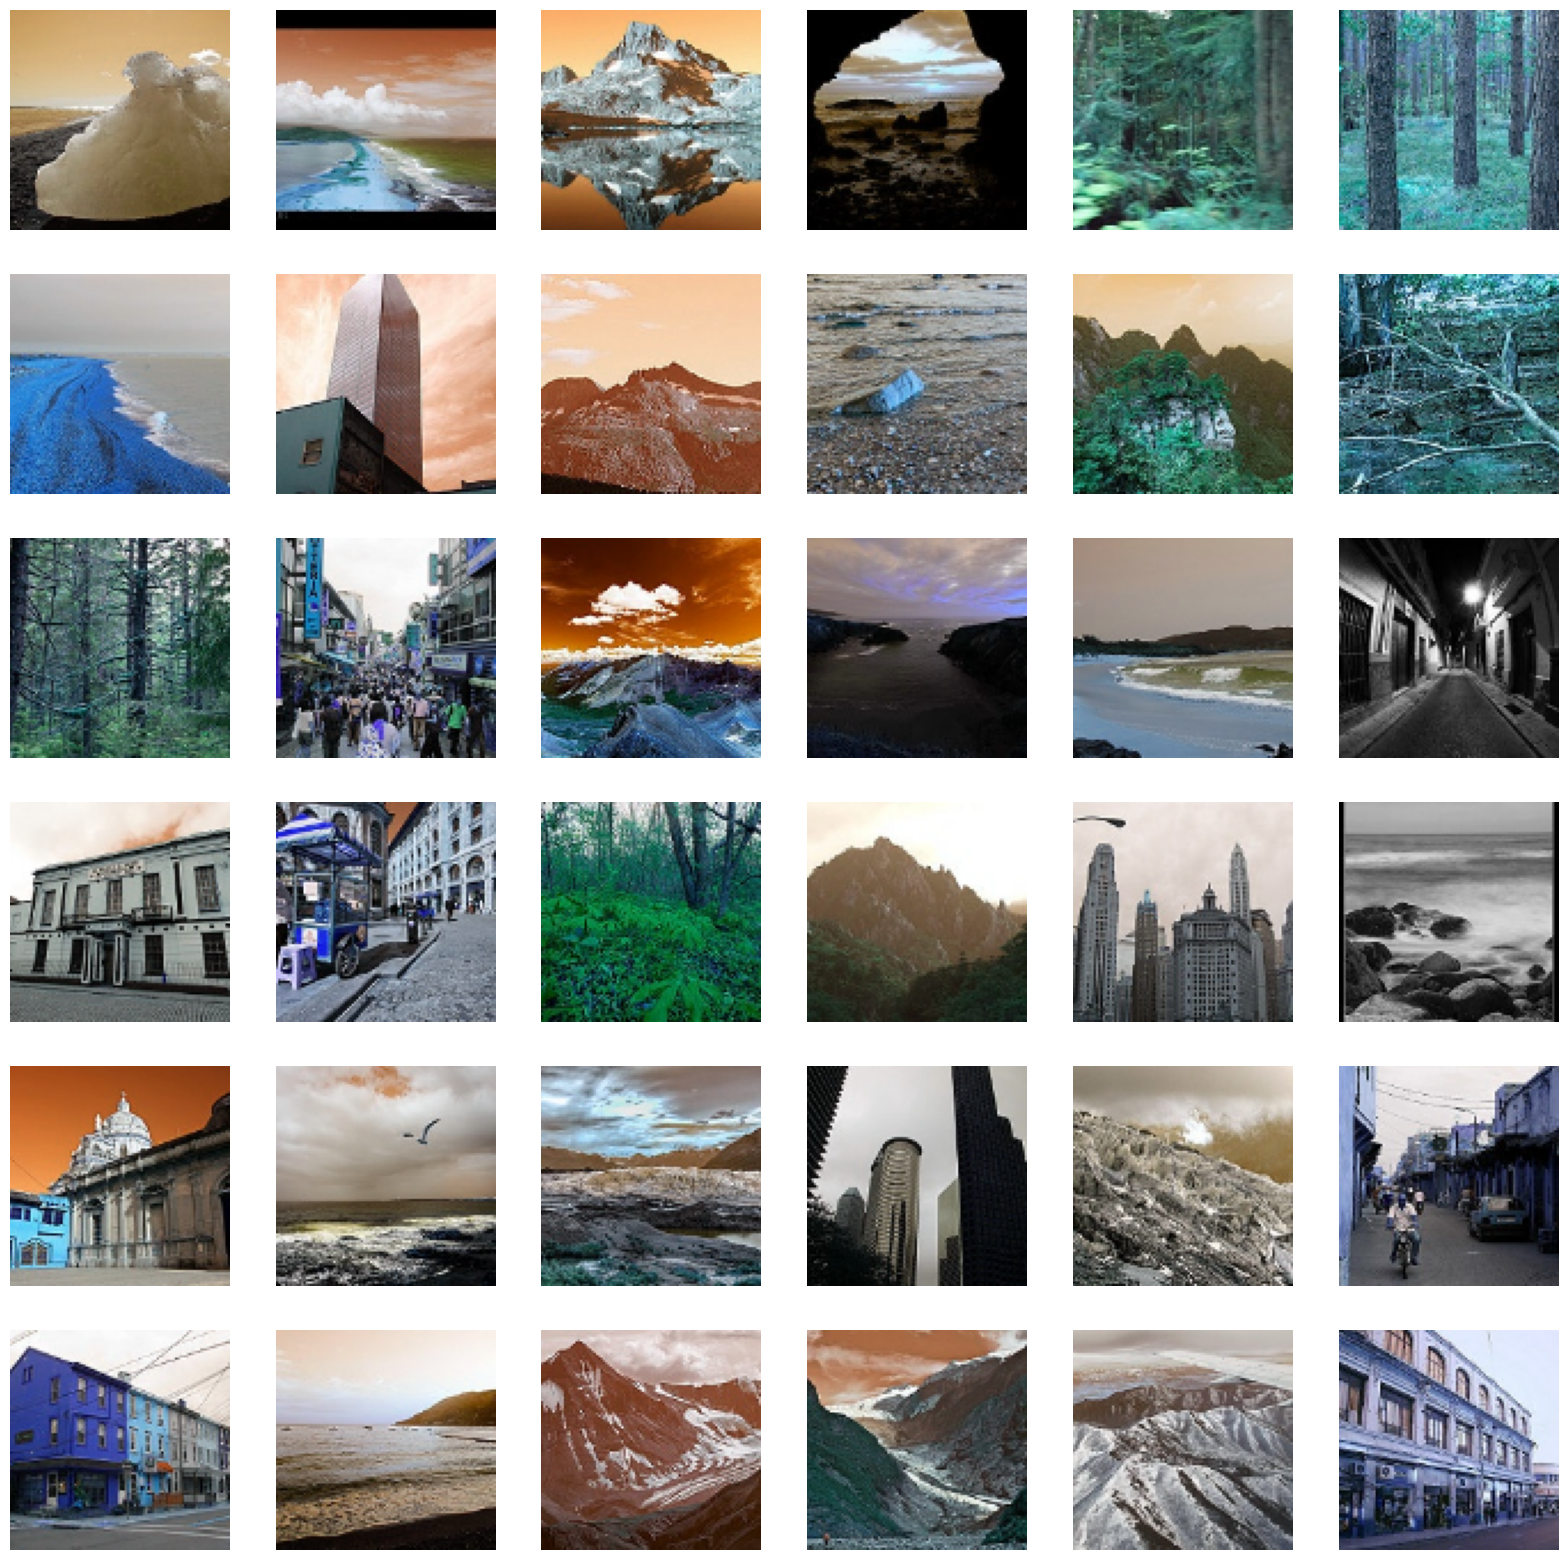

In [7]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
#     plt.title(getcode(y[i]))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (11227, 96, 96, 3)
X_test shape  is (2807, 96, 96, 3)
y_train shape  is (11227,)
y_test shape  is (2807,)


In [10]:
num_classes=6
inc = InceptionV3(input_shape=(96,96,3),weights='imagenet',include_top=False)
x= layers.Flatten()(inc.output)
pred=layers.Dense(num_classes,activation="softmax")(x)
model=models.Model(inputs=inc.input,outputs=pred)

87910968/87910968 [==============================] - 1s 0us/step


In [11]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 47, 47, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 47, 47, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 47, 47, 32)           0         ['batch_normalization[0][0

In [12]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
Pre_trained= model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
351/351 [==============================] - 60s 64ms/step - loss: 0.9119 - accuracy: 0.7145 - val_loss: 1.9820 - val_accuracy: 0.5967
Epoch 2/10
351/351 [==============================] - 19s 54ms/step - loss: 0.9489 - accuracy: 0.7011 - val_loss: 692.0365 - val_accuracy: 0.2978
Epoch 3/10
351/351 [==============================] - 19s 54ms/step - loss: 0.7295 - accuracy: 0.7611 - val_loss: 0.7026 - val_accuracy: 0.7813
Epoch 4/10
351/351 [==============================] - 19s 54ms/step - loss: 1.0428 - accuracy: 0.6610 - val_loss: 1.5059 - val_accuracy: 0.5622
Epoch 5/10
351/351 [==============================] - 19s 55ms/step - loss: 1.1876 - accuracy: 0.5796 - val_loss: 17.2482 - val_accuracy: 0.5600
Epoch 6/10
351/351 [==============================] - 19s 55ms/step - loss: 0.9730 - accuracy: 0.6744 - val_loss: 2.6284 - val_accuracy: 0.4442
Epoch 7/10
351/351 [==============================] - 19s 54ms/step - loss: 0.8904 - accuracy: 0.6944 - val_loss: 0.9082 - val_accura

# **Result**

88/88 [==============================] - 3s 14ms/step


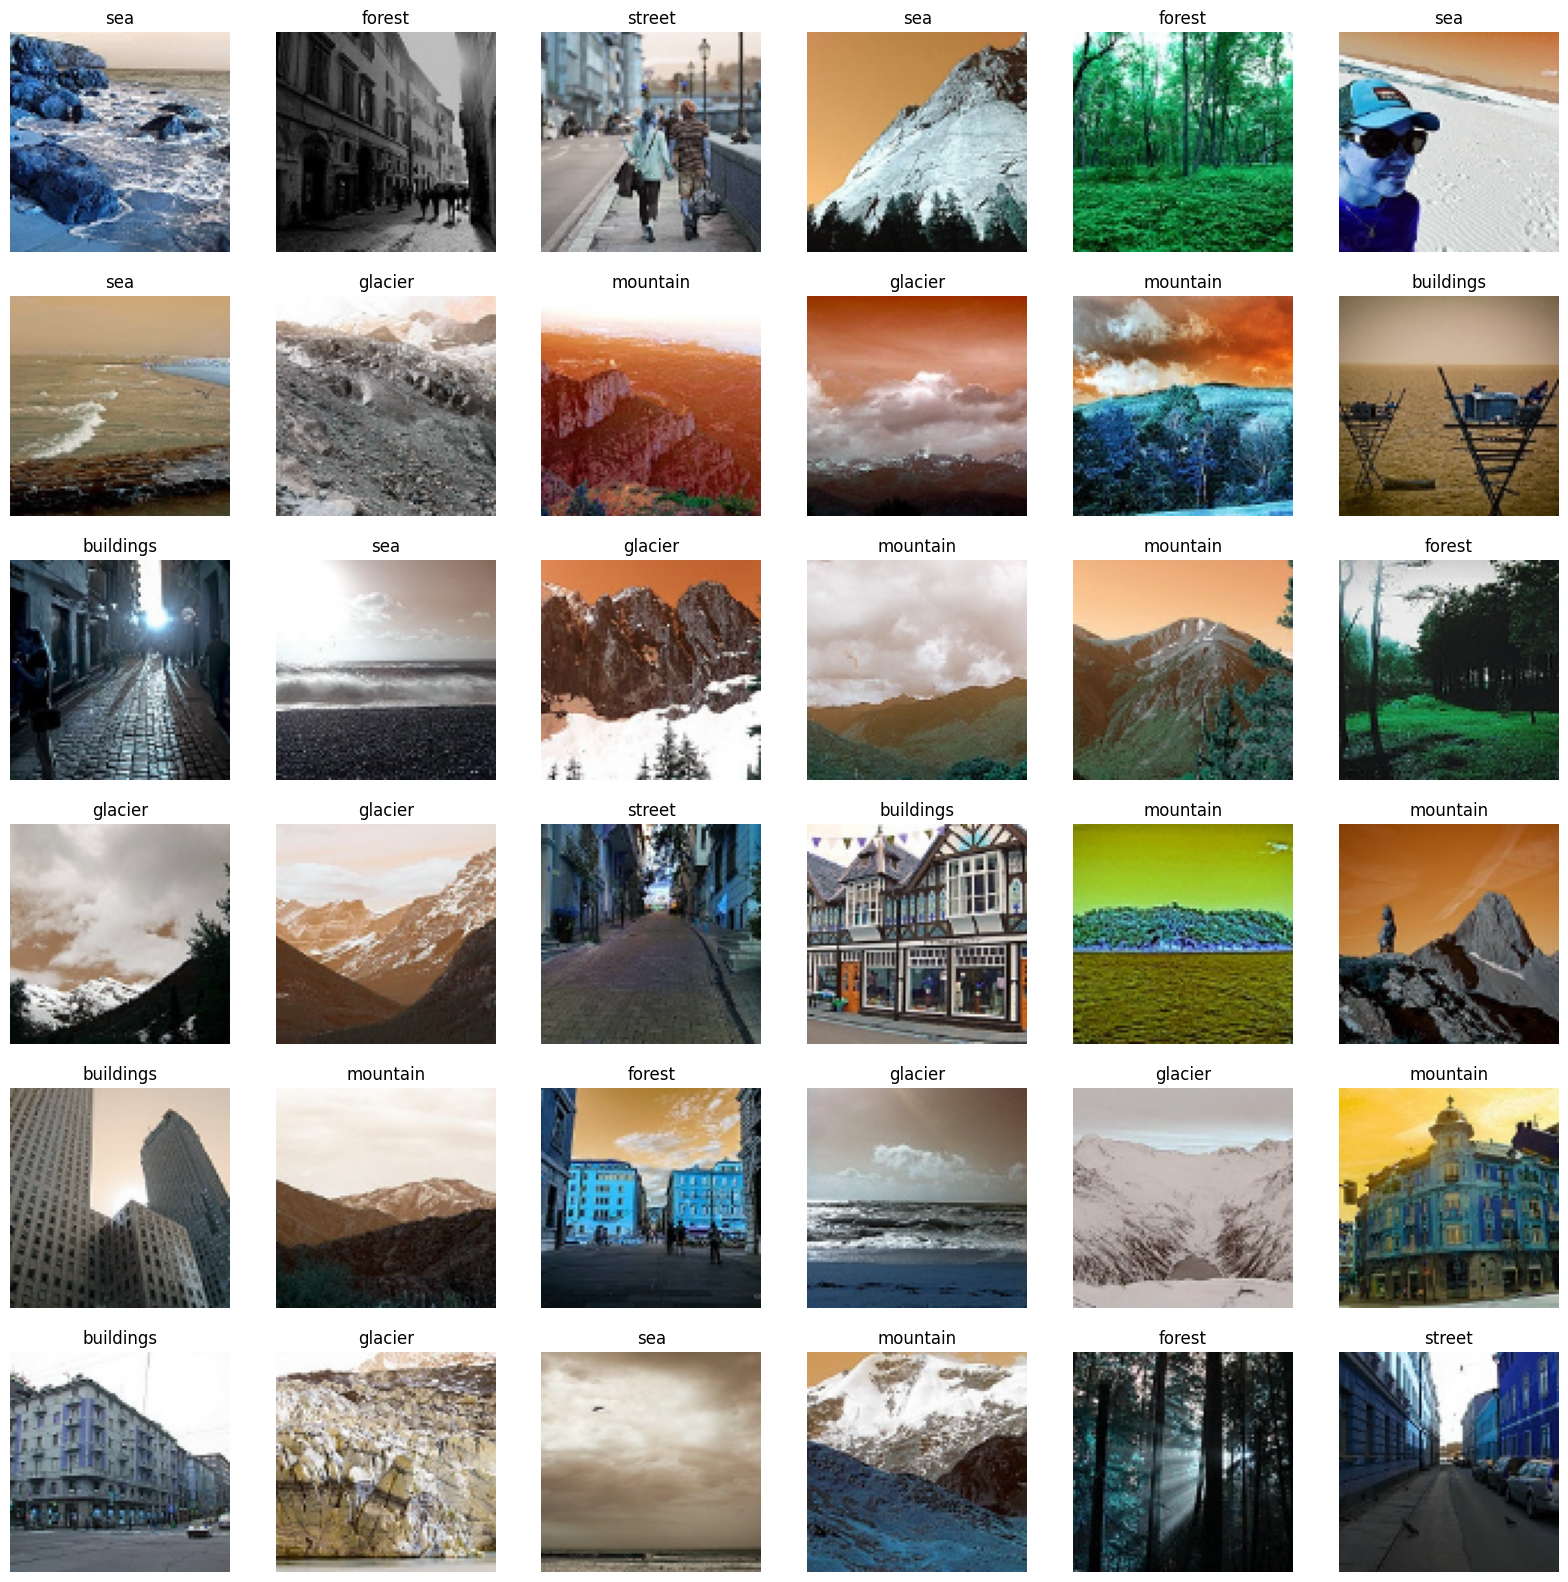

In [14]:
y_result = model.predict(X_test)
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))